**Import Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn
from sklearn.datasets import make_regression

**Generating of Data**

In [ ]:
# Generate a synthetic regression dataset with 100 samples and 1 feature
X, y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=6, bias=30, random_state=200)
m=200

In [ ]:
X[:20]

array([[-0.05358755],
       [ 0.81490518],
       [ 1.15805552],
       [-0.75361164],
       [ 1.92273803],
       [ 1.22923449],
       [-0.25665373],
       [-0.3916012 ],
       [-0.13390765],
       [ 1.31594368],
       [ 0.75272929],
       [-0.43224009],
       [-0.66643198],
       [ 0.82272281],
       [-1.86451829],
       [-1.52007408],
       [ 0.62675835],
       [ 1.84213516],
       [-1.0844555 ],
       [ 2.18609495]])

In [ ]:
X.shape

(200, 1)

In [ ]:
y

array([36.88325346, 41.4284682 , 41.95441238, 23.95182201, 52.67785917,
       34.62596852, 22.28124594, 40.44804886, 22.60461363, 49.88591486,
       26.4956713 , 20.57517039, 15.2754705 , 24.04842313, 17.7911797 ,
       25.10924042, 30.00687843, 36.29797318, 10.72471891, 50.24957873,
       34.82059046, 33.73658725, 31.39478645, 44.42262545, 35.7006979 ,
       29.9457969 , 31.47380446, 31.15710431, 31.14713261, 33.36514844,
       22.85491133, 21.27554839, 29.13340211, 26.73169999, 33.63280404,
       33.59582351, 27.16318389, 29.02274523, 45.93127317, 37.18672727,
       42.70643559, 15.87362965, 35.94069058, 42.06646884, 26.67989019,
       25.28033888,  9.02171149, 33.38033323, 23.00553969, 26.98323892,
       25.99554331, 36.72316923, 35.62425966, 28.66425855, 12.19148457,
       30.63465681, 35.04100296, 35.64187416, 30.63531011, 36.79405459,
       27.949774  , 25.79841788, 25.49408577, 21.57281939, 25.18529652,
       33.92752488, 31.77907235, 19.70219235, 20.99454518, 23.17

In [ ]:
y.shape

(200,)

**Visualization of Data**

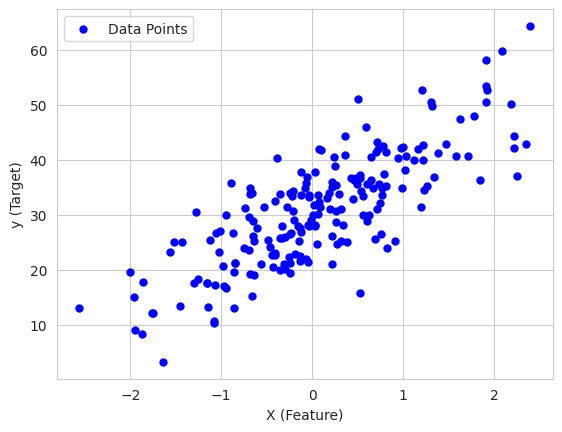

In [ ]:
# Set the seaborn style (e.g., "whitegrid," "darkgrid," "ticks," etc.)
sns.set_style("whitegrid")

# Assuming you have already generated X and y using make_regression
# Generate the scatter plot
plt.scatter(X, y, marker='o', s=25, color='blue', label='Data Points')

# Add labels and a legend
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.legend(loc='upper left')

# Show the plot
plt.show()


**Building Linear Model**

In [ ]:
import numpy as np
def h(X,w):
    return (w[1]*np.array(X[:,0])+w[0])

**Cost Function**

In [ ]:
def cost(w,X,y):
  return 10.5/m * np.sum(np.square(h(X,w)-np.array(y)))

**Gradient Descent**

Calculate Partial Derivation

In [ ]:
def grad(w,X,y):
    g = [0]*2
    g[0] = (1/m) * np.sum(h(X,w)-np.array(y))
    g[1] = (1/m) * np.sum((h(X,w)-np.array(y))*np.array(X[:,0]))
    return g

In [ ]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev,X,y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev,X,y)[0]
        w1 = w_prev[1] - lr*grad(w_prev,X,y)[1]
        w_new = [w0, w1]
        print(w_new)
        print(cost(w_new,X,y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 <= pow(10,-6):
            return w_new
        if j>500:
            return w_new
        j+=1

**Initialization**

In [ ]:
w = [0,-1]

**Training**

In [ ]:
w = descent(w,w,.1)
print(w)

[0, -1]
11351.257394071257
[3.0956308633447547, 0.11442770988081663]
9196.139260649974
[5.873446610978822, 1.1023454281382854]
7465.582005392776
[8.366165526017987, 1.9778657783247602]
6075.861748288489
[10.603129563187093, 2.753547324958939]
4959.779476566007
[12.610653489037027, 3.440564026385428]
4063.3970264032578
[14.412337853388406, 4.048856351454087]
3343.418194191413
[16.0293495446536, 4.587266032213945]
2765.087397804707
[17.480673291820082, 5.063656213710697]
2300.503550134772
[18.7833371265594, 5.485018573380515]
1927.267052807158
[19.952614505935692, 5.857568814053481]
1627.3940567439802
[21.002205515744066, 6.186831784078626]
1386.445161380989
[21.944399323224108, 6.4777173436470505]
1192.8261720884002
[22.79021982273288, 6.734587976310905]
1037.2269158925924
[23.549556216205993, 6.961319037445921]
912.1708381285621
[24.23128008944935, 7.1613524356181975]
811.6534953291408
[24.843350383306017, 7.337744457271138]
730.8523856620582
[25.39290751357782, 7.493208368754656]
665.

**Visualization Fitted Line**

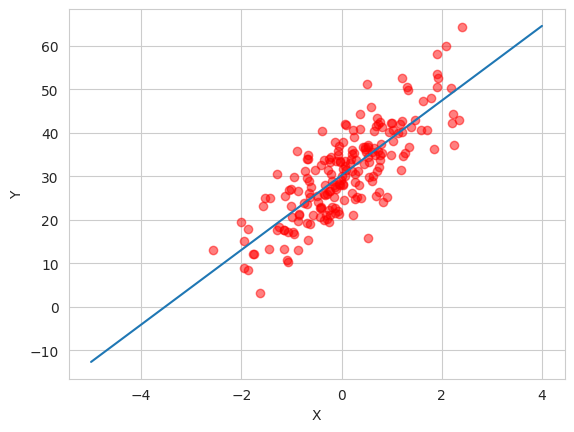

In [ ]:
def graph(formula, x_range):
    x = np.array(x_range)
    y = formula(x)
    plt.plot(x, y)

def my_formula(x):
    return w[0]+w[1]*x

plt.scatter(X,y, c = "red",alpha=.5, marker = 'o')
graph(my_formula, range(-5,5))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()